In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp, pearsonr, linregress
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from dms_3d_features.plotting import plot_pop_avg_from_row, publication_style_ax, plot_motif_boxplot_stripplot

In [17]:
DATA_PATH = "../data"

In [18]:
df = pd.read_json(f"{DATA_PATH}/raw-jsons/residues/pdb_library_1_residues.json")
df["ln_r_data"] = np.log(df["r_data"])
df_ca = df.query("r_nuc == 'C' and r_type == 'NON-WC' and likely_pair == 'CA'").copy()
df_ca["stack"] = df_ca["p5_res"] + df_ca["p3_res"]


/opt/homebrew/Caskroom/miniconda/base/envs/py3/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### single mismatches

<Axes: xlabel='r_data', ylabel='m_sequence'>

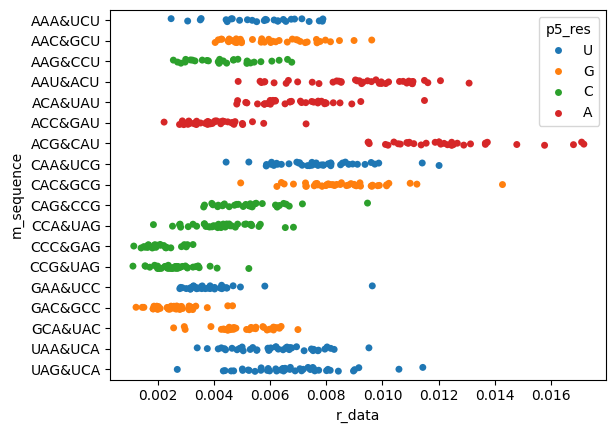

In [19]:

sns.stripplot(data=df_ca.query("m_token == '1x1'"), y="m_sequence", x="r_data", hue="p5_res", jitter=True)

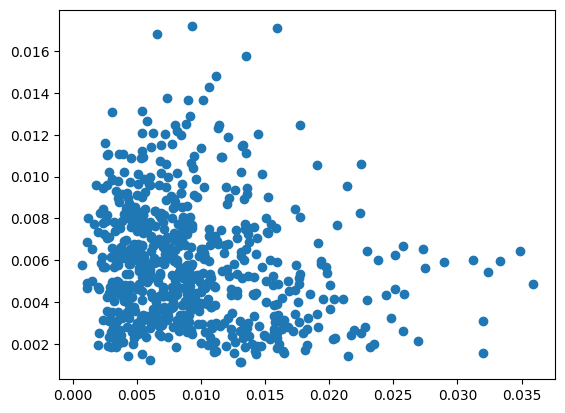

In [47]:
df_ca_1x1 = df.query("(likely_pair == 'CA' or likely_pair == 'AC') and m_token == '1x1'").copy()
data = []
m_seqs = []
for i, g in df_ca_1x1.groupby(["m_sequence", "constructs"]):
    if len(g) != 2:
        continue
    if g.iloc[0]["r_nuc"] == "A":
        data.append([g.iloc[0]["r_data"], g.iloc[1]["r_data"]])
    else:
        data.append([g.iloc[1]["r_data"], g.iloc[0]["r_data"]])
    m_seqs.append(g.iloc[0]["m_sequence"])
data = np.array(data)
plt.scatter(data[:, 0], data[:, 1])

<Axes: xlabel='diff', ylabel='m_sequence'>

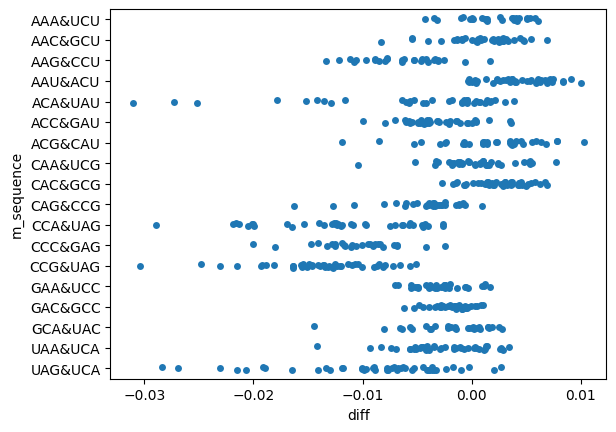

In [51]:
diffs = []
for i, d in enumerate(data):
    diffs.append([m_seqs[i], d[1] - d[0]])
df_diff = pd.DataFrame(diffs, columns=["m_sequence", "diff"])
sns.stripplot(data=df_diff, y="m_sequence", x="diff")

<Axes: xlabel='r_data', ylabel='m_sequence'>

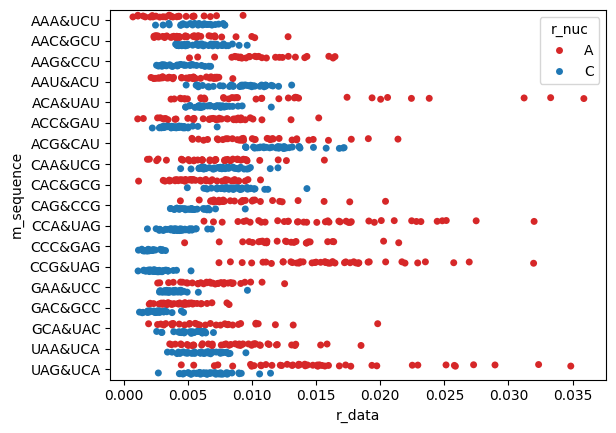

In [42]:
df_ca_1x1 = df.query("(likely_pair == 'CA' or likely_pair == 'AC') and m_token == '1x1'").copy()
sns.stripplot(data=df_ca_1x1, y="m_sequence", x="r_data", hue="r_nuc", dodge=True, jitter=True, palette=["tab:red", "tab:blue"])

<Axes: xlabel='r_data', ylabel='stack'>

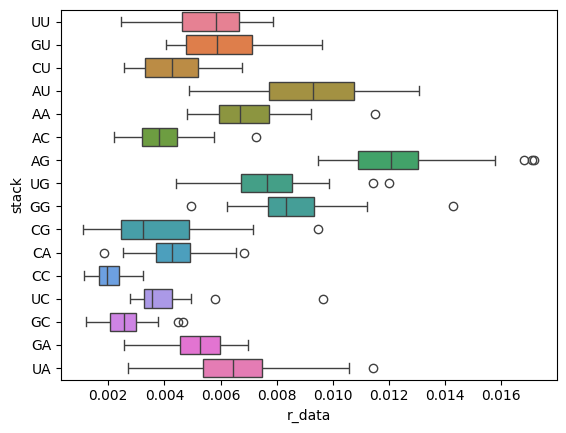

In [66]:
df_ca_1x1 = df.query("likely_pair == 'CA' and m_token == '1x1'").copy()
df_ca_1x1["stack"] = df_ca_1x1["p5_res"] + df_ca_1x1["p3_res"]
sns.boxplot(data=df_ca_1x1, y="stack", x="r_data", hue="stack")

/opt/homebrew/Caskroom/miniconda/base/envs/py3/lib/python3.8/site-packages/dms_3d_features/plotting.py:375: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/opt/homebrew/Caskroom/miniconda/base/envs/py3/lib/python3.8/site-packages/dms_3d_features/plotting.py:375: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/opt/homebrew/Caskroom/miniconda/base/envs/py3/lib/python3.8/site-packages/dms_3d_features/plotting.py:375: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/opt/homebrew/Caskroom/miniconda/base/envs/py3/lib/python3.8/site-packages/dms_3d_

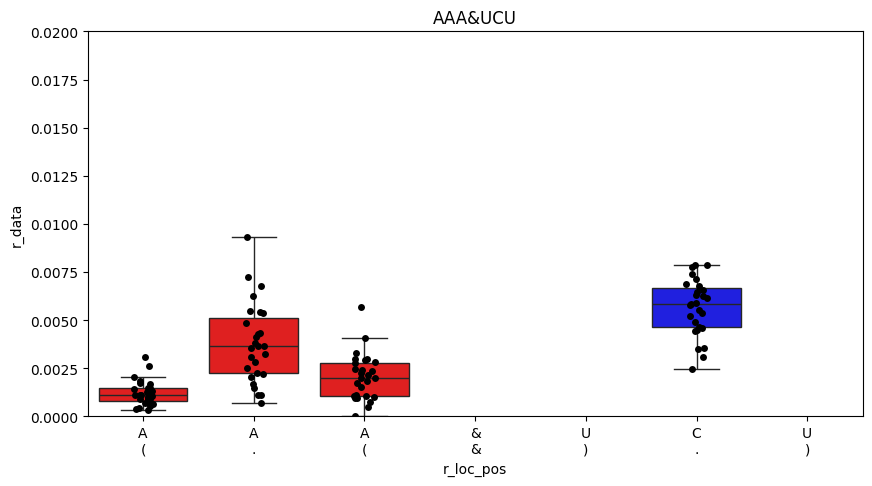

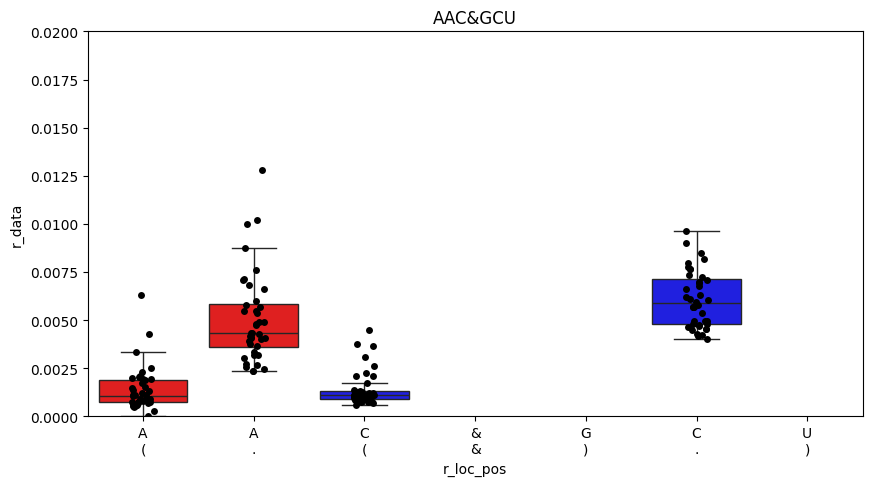

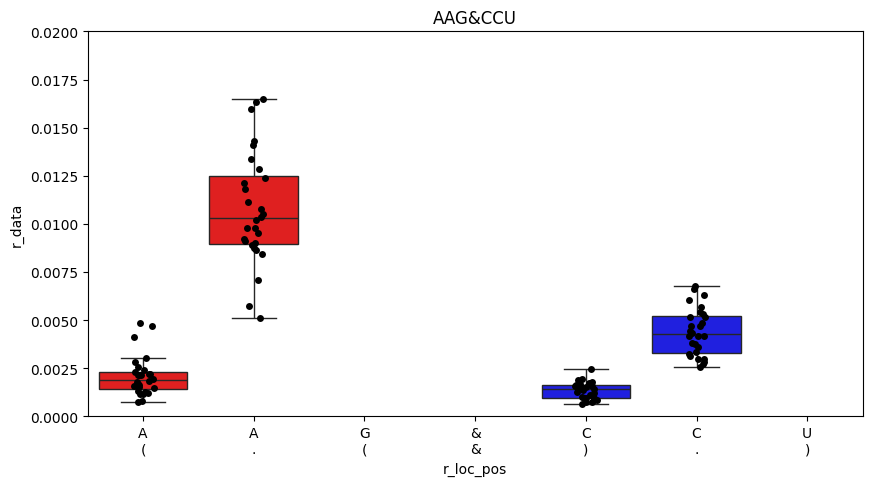

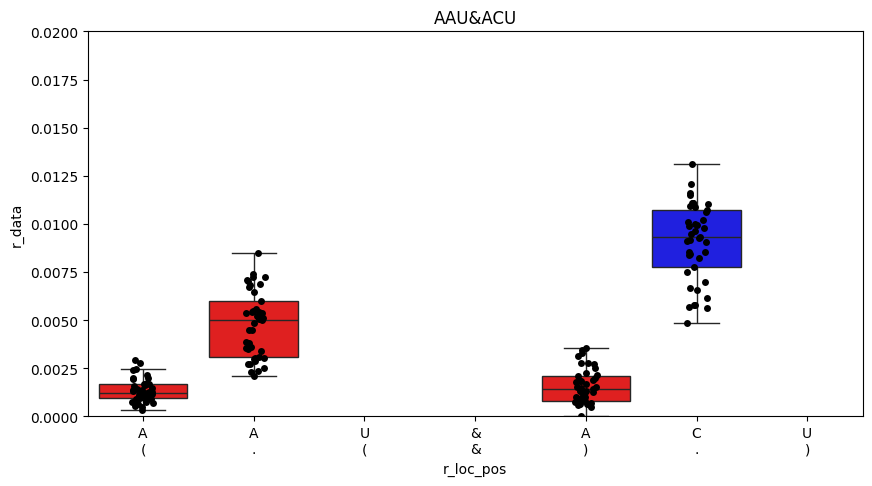

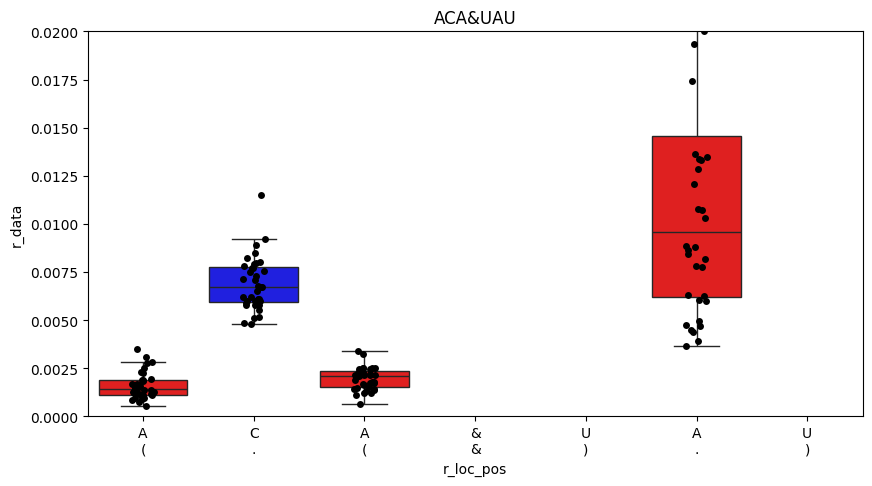

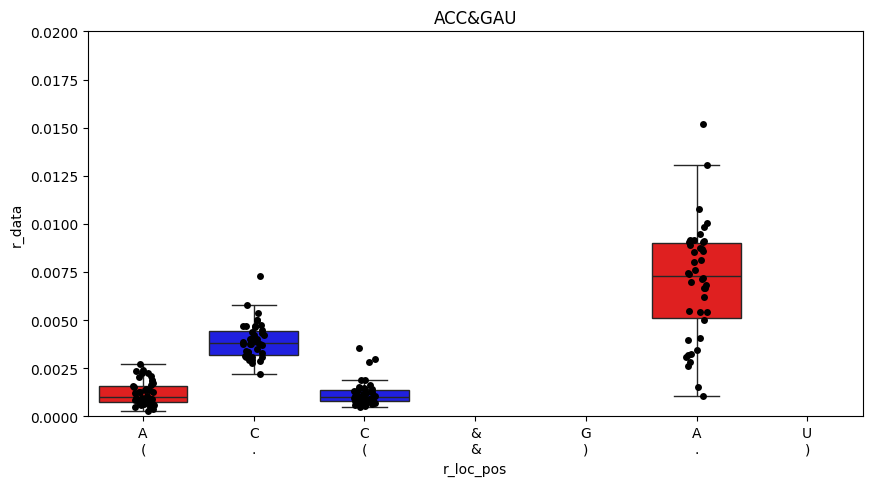

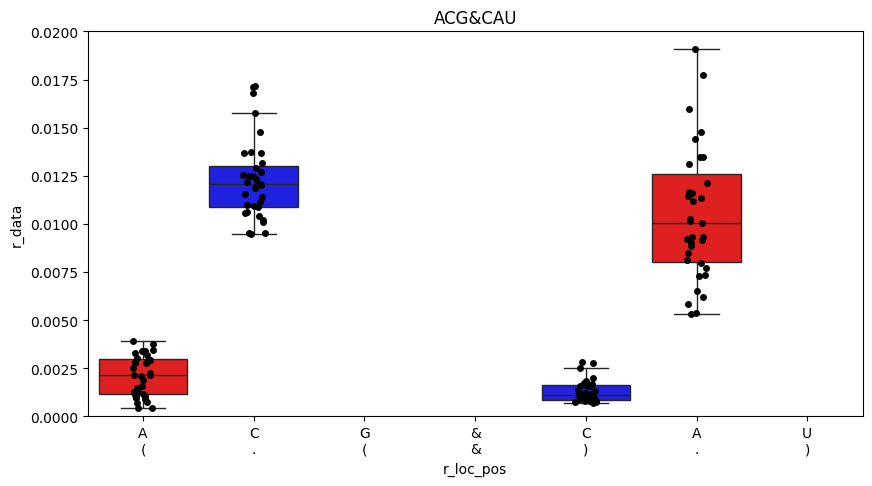

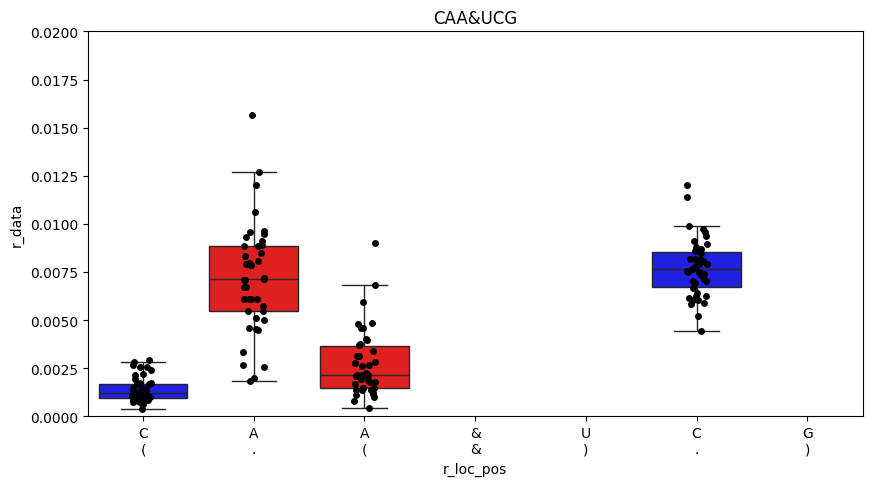

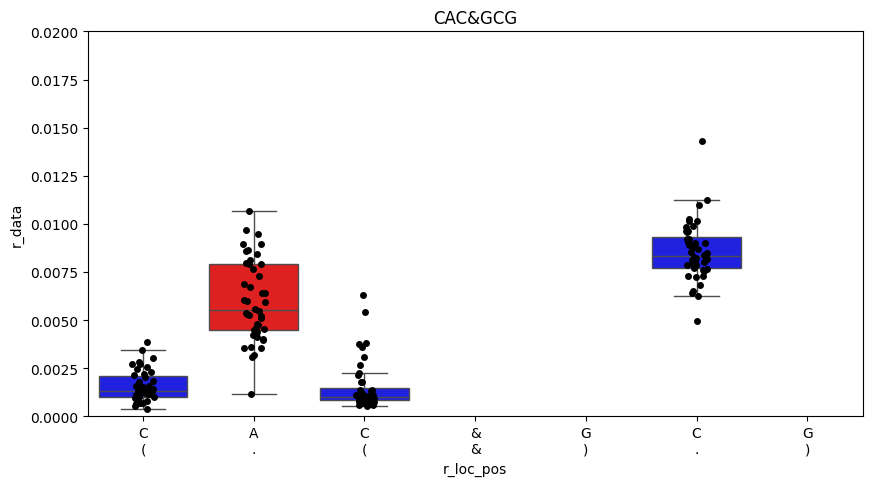

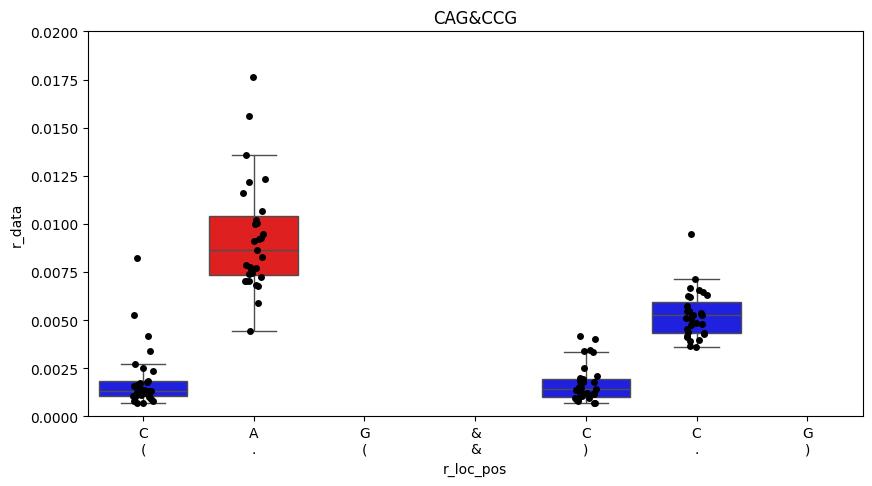

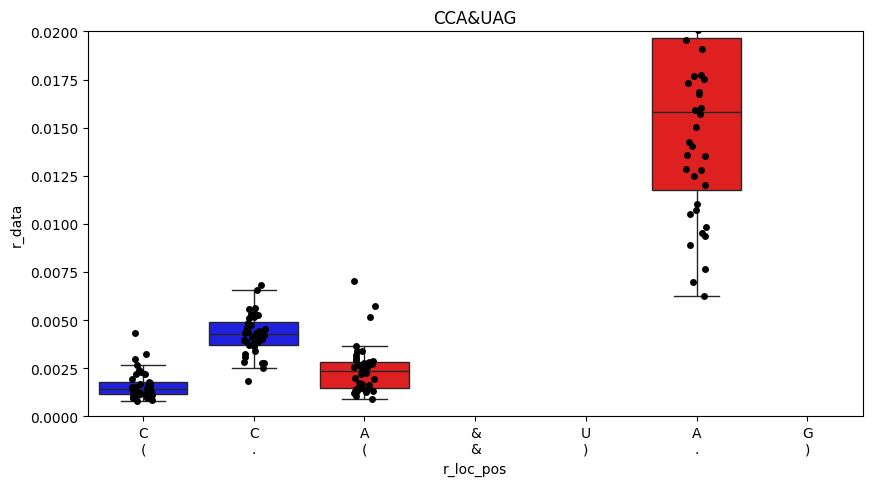

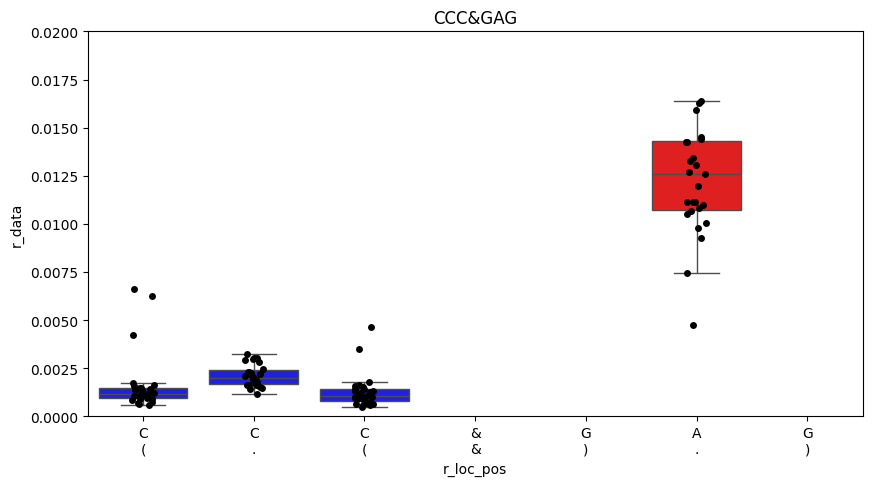

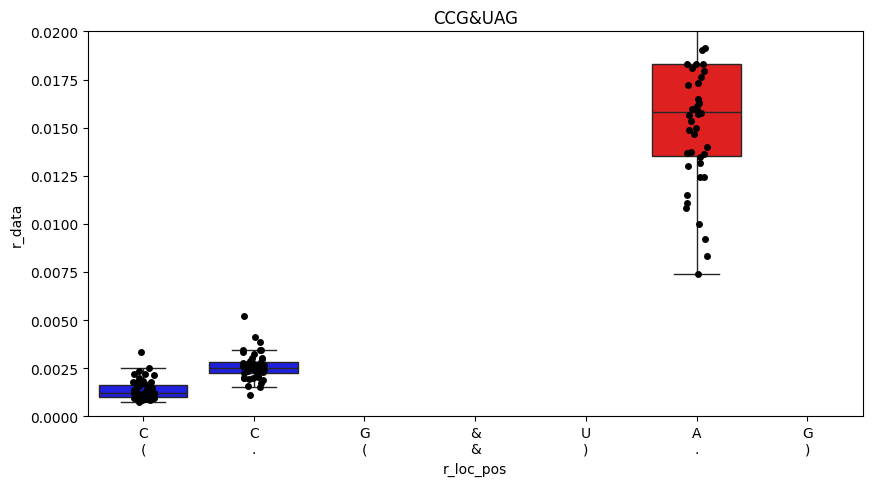

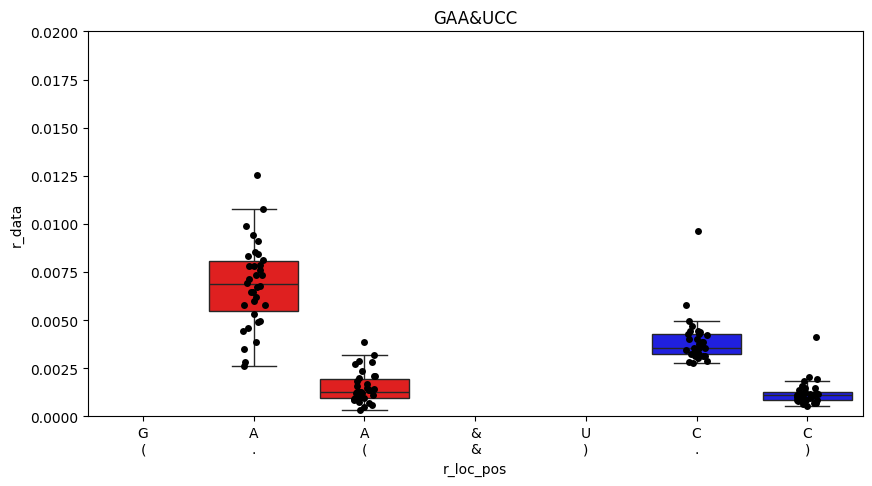

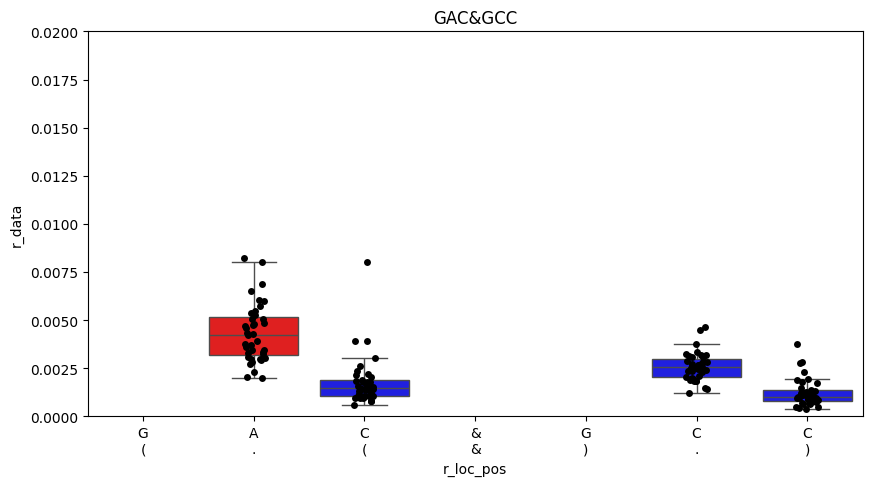

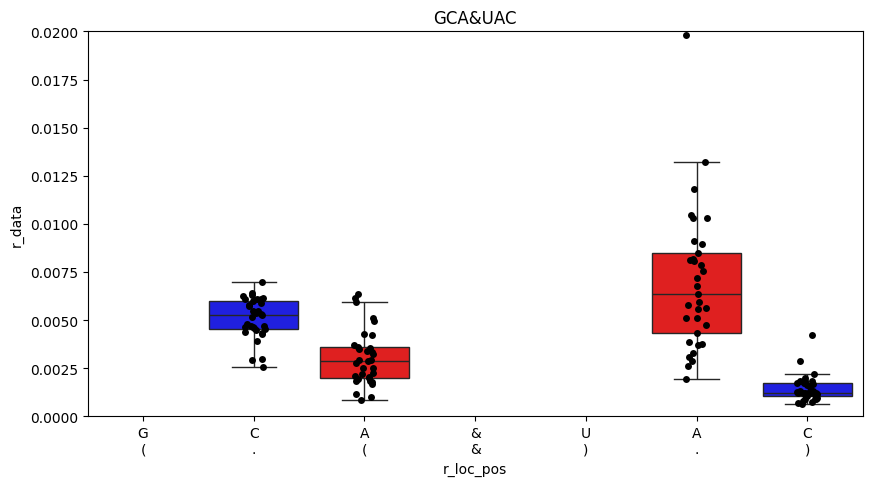

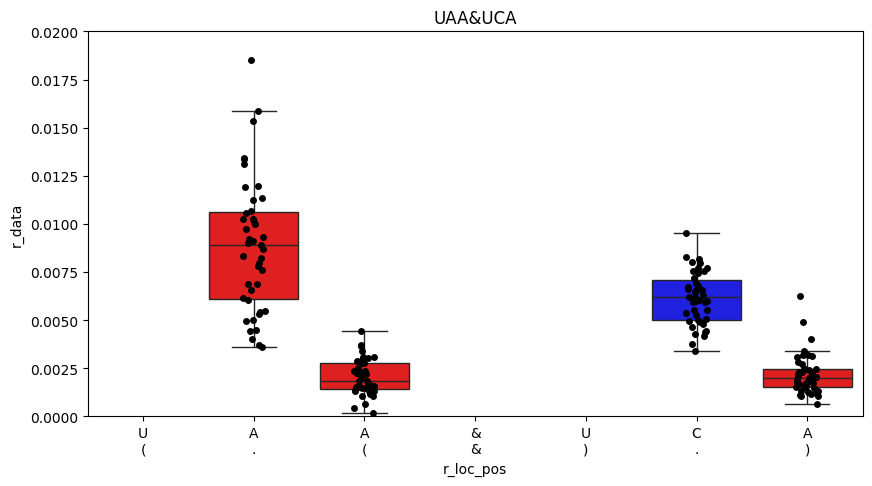

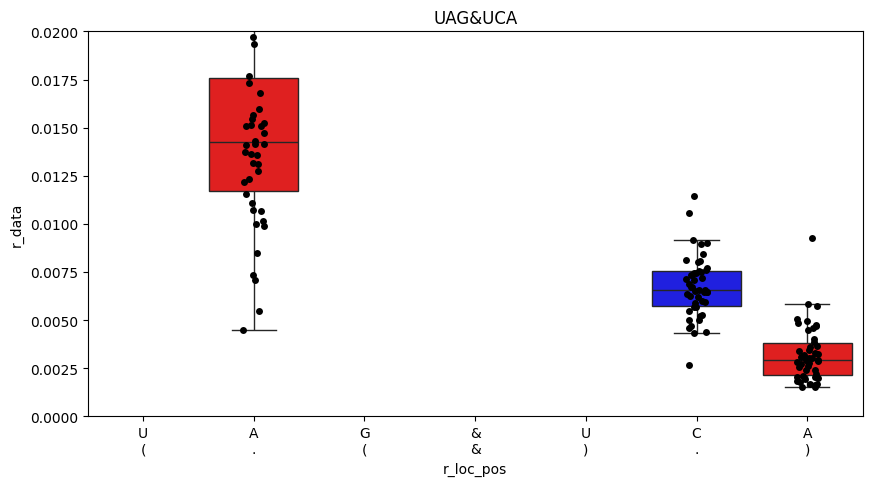

In [27]:
for m_seq in df_ca.query("m_token == '1x1'")["m_sequence"].unique():
    df_m_seq = df.query(f"m_sequence == '{m_seq}'")
    ax = plot_motif_boxplot_stripplot(df_m_seq)
    ax.set_title(m_seq)
    ax.set_ylim([0, 0.02])

<Axes: xlabel='r_data', ylabel='m_sequence'>

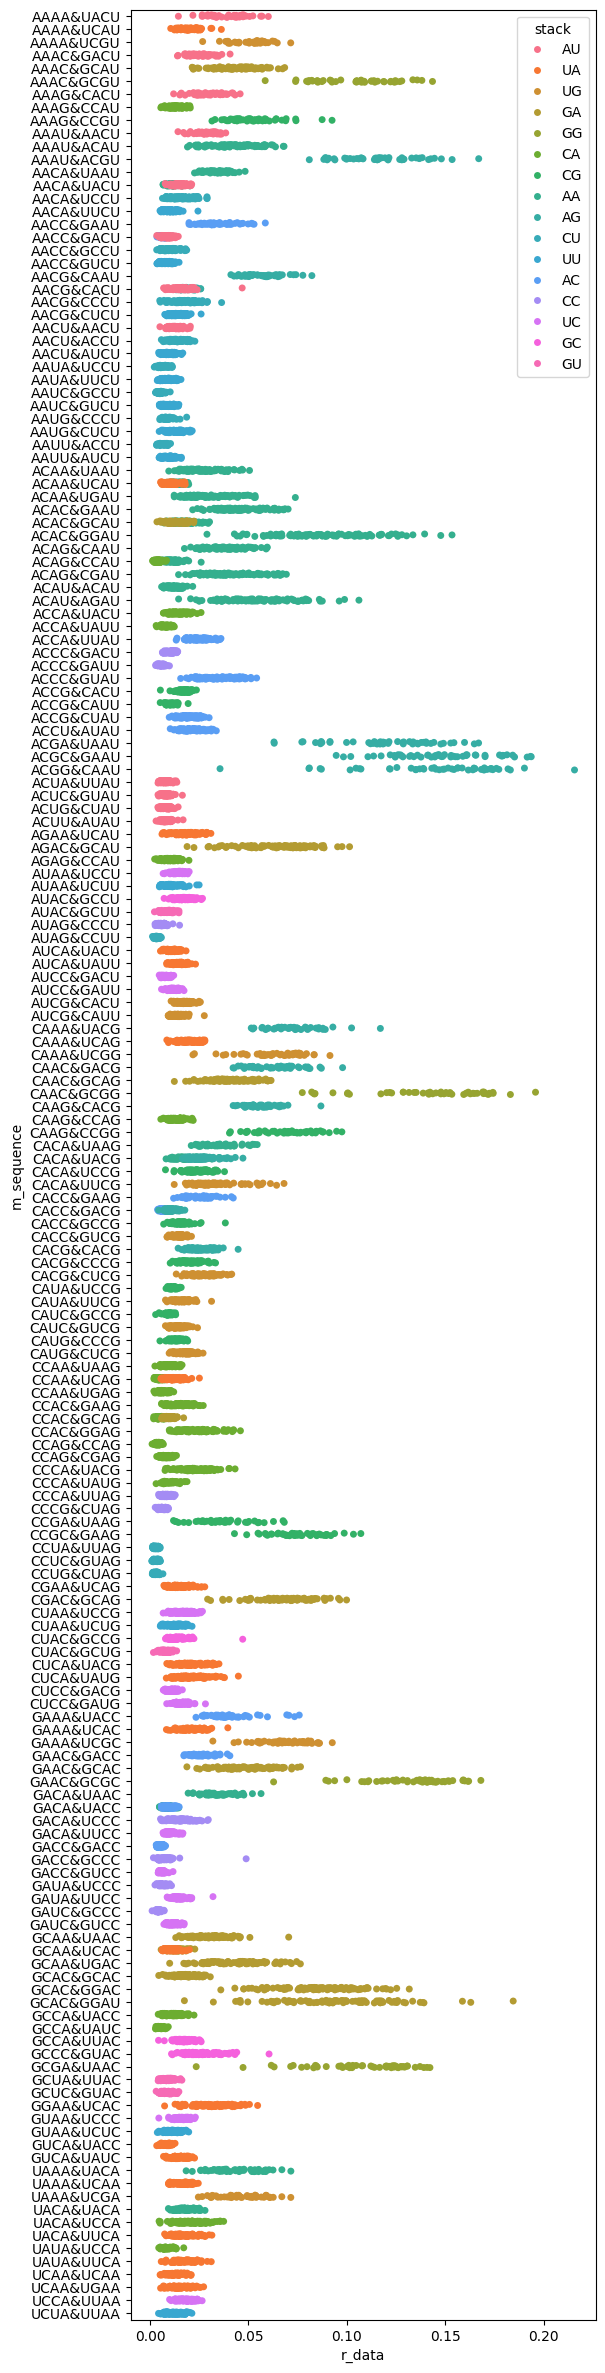

In [61]:
df_ca_2x2 = df.query("likely_pair == 'CA' and m_token == '2x2'").copy()
df_ca_2x2["stack"] = df_ca_2x2["p5_res"] + df_ca_2x2["p3_res"]
fig, ax = plt.subplots(figsize=(6, 30))
sns.stripplot(data=df_ca_2x2, y="m_sequence", x="r_data", jitter=True, ax=ax, hue="stack")

<Axes: xlabel='r_data', ylabel='stack'>

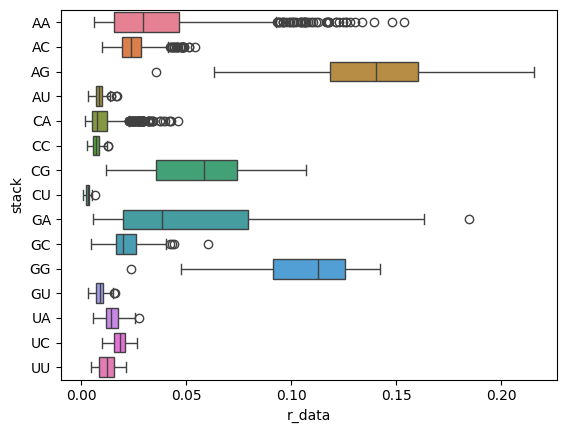

In [69]:
df_ca_2x2 = df.query("likely_pair == 'CA' and m_token == '2x2' and r_loc_pos == 1").copy()
df_ca_2x2["stack"] = df_ca_2x2["p5_res"] + df_ca_2x2["p3_res"]
sns.boxplot(data=df_ca_2x2, y="stack", x="r_data", hue="stack")

<Axes: xlabel='r_data', ylabel='p3_res'>

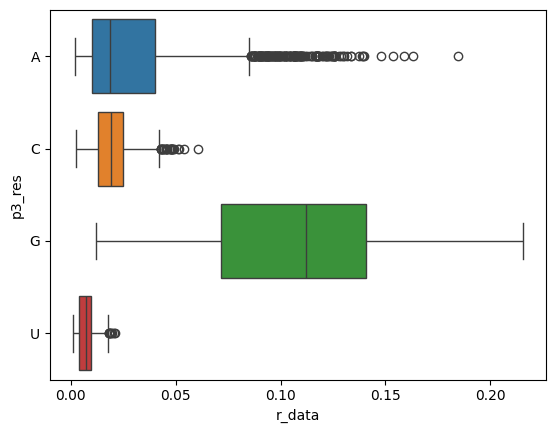

In [75]:
df_ca_2x2 = df.query("likely_pair == 'CA' and m_token == '2x2' and r_loc_pos == 1").copy()
df_ca_2x2["stack"] = df_ca_2x2["p5_res"] + df_ca_2x2["p3_res"]
sns.boxplot(data=df_ca_2x2, y="p3_res", x="r_data", hue="p3_res")

<Axes: xlabel='r_data', ylabel='stack'>

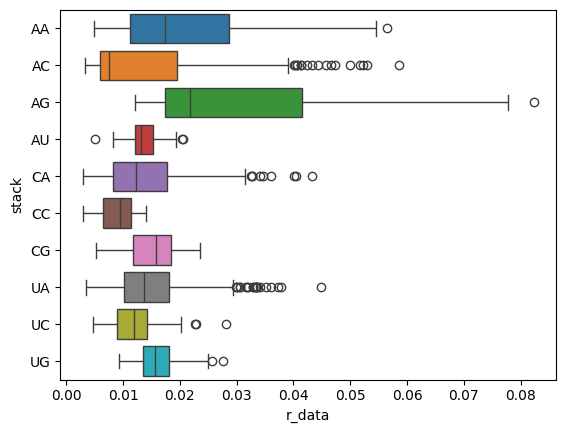

In [70]:
df_ca_2x2 = df.query("likely_pair == 'CA' and m_token == '2x2' and r_loc_pos == 2").copy()
df_ca_2x2["stack"] = df_ca_2x2["p5_res"] + df_ca_2x2["p3_res"]
sns.boxplot(data=df_ca_2x2, y="stack", x="r_data", hue="stack")

<Axes: xlabel='r_data', ylabel='stack'>

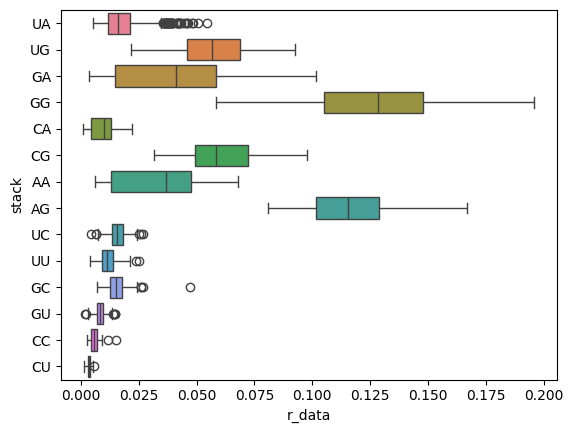

In [72]:
df_ca_2x2 = df.query("likely_pair == 'CA' and m_token == '2x2' and r_loc_pos == 6").copy()
df_ca_2x2["stack"] = df_ca_2x2["p5_res"] + df_ca_2x2["p3_res"]
sns.boxplot(data=df_ca_2x2, y="stack", x="r_data", hue="p5")

In [78]:
def assign_stack_type(row):
    if row["both_pyrimidine"]:
        return "both_pyrimidine"
    elif row["both_purine"]:
        return "both_purine"
    else:
        return "mixed"

<Axes: xlabel='ln_r_data', ylabel='stack_type'>

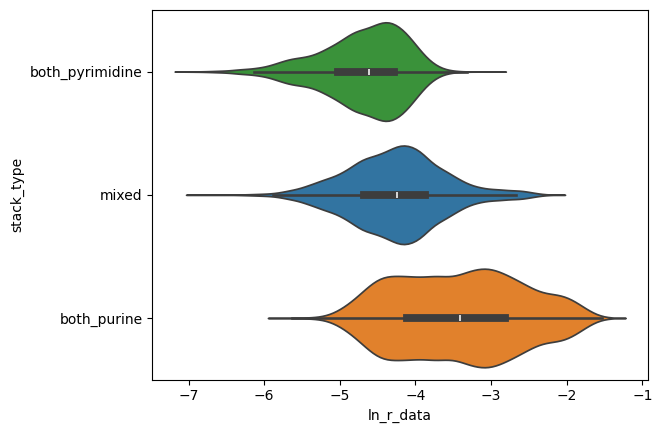

In [84]:
df_ca_2x2 = df.query("likely_pair == 'CA' and m_token == '2x2'").copy()
df_ca_2x2["stack_type"] = df_ca_2x2.apply(assign_stack_type, axis=1)
sns.violinplot(data=df_ca_2x2, y="stack_type", x="ln_r_data", hue="stack_type", order=["both_pyrimidine", "mixed", "both_purine"])

<Axes: xlabel='ln_r_data', ylabel='stack_type'>

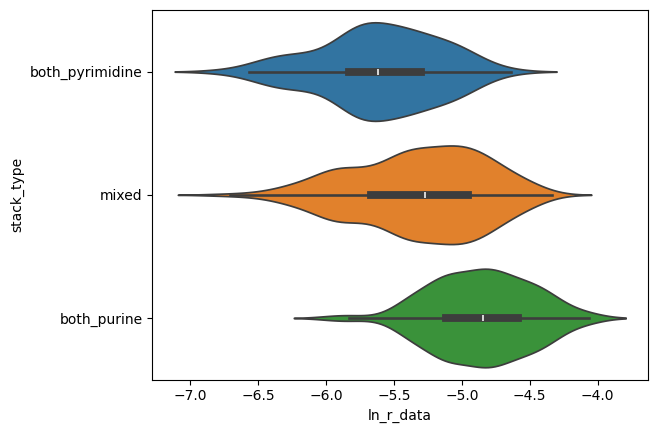

In [89]:
df_ca = df.query("likely_pair == 'CA' and m_token == '1x1'").copy()
df_ca["stack_type"] = df_ca.apply(assign_stack_type, axis=1)
sns.violinplot(data=df_ca, y="stack_type", x="ln_r_data", hue="stack_type", order=["both_pyrimidine", "mixed", "both_purine"])

<Axes: xlabel='ln_r_data', ylabel='stack_type'>

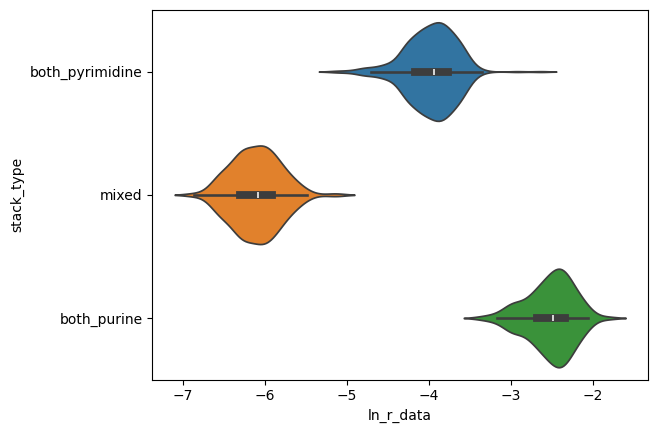

In [90]:
df_ca = df.query("likely_pair == 'CA' and m_token == '3x3'").copy()
df_ca["stack_type"] = df_ca.apply(assign_stack_type, axis=1)
sns.violinplot(data=df_ca, y="stack_type", x="ln_r_data", hue="stack_type", order=["both_pyrimidine", "mixed", "both_purine"])

<Axes: xlabel='ln_r_data', ylabel='stack_type'>

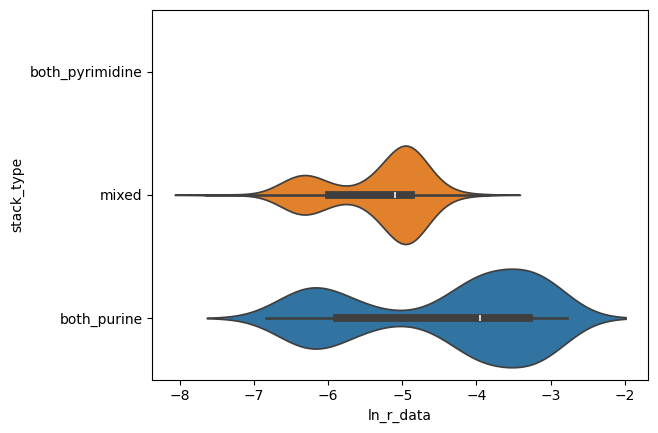

In [91]:
df_ca = df.query("likely_pair == 'CA' and m_token == '4x4'").copy()
df_ca["stack_type"] = df_ca.apply(assign_stack_type, axis=1)
sns.violinplot(data=df_ca, y="stack_type", x="ln_r_data", hue="stack_type", order=["both_pyrimidine", "mixed", "both_purine"])

<Axes: xlabel='ln_r_data', ylabel='stack_type'>

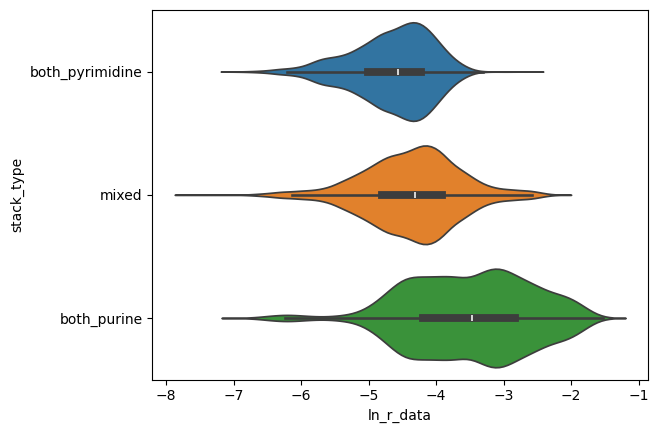

In [88]:
df_ca = df.query("likely_pair == 'CA'").copy()
df_ca["stack_type"] = df_ca.apply(assign_stack_type, axis=1)
sns.violinplot(data=df_ca, y="stack_type", x="ln_r_data", hue="stack_type", order=["both_pyrimidine", "mixed", "both_purine"])

<Axes: xlabel='ln_r_data', ylabel='stack_type'>

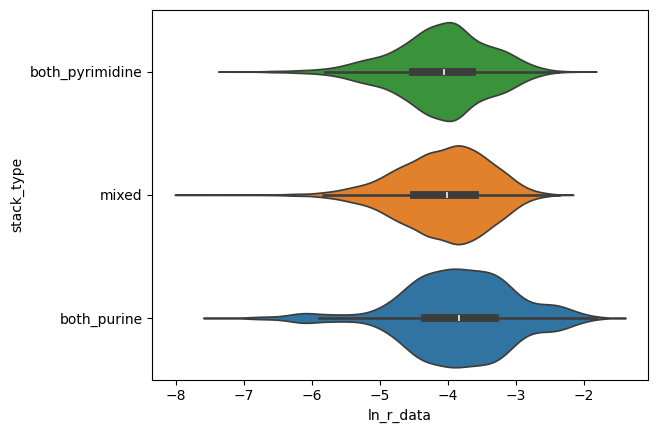

In [86]:
df_ca = df.query("likely_pair == 'AC'").copy()
df_ca["stack_type"] = df_ca.apply(assign_stack_type, axis=1)
sns.violinplot(data=df_ca, y="stack_type", x="ln_r_data", hue="stack_type", order=["both_pyrimidine", "mixed", "both_purine"])